<font size="+3"><strong>Prediction Using Decision Tree Algorithm</strong></font>

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
import seaborn as sns

# Model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# **1. Data Preparation**

## **1.1. Import**

In [ ]:
df = pd.read_excel('/content/Iris.xlsx')
print(df.shape)
print(df.info())
df.head()

(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **1.2. Explore**

In [ ]:
# Class Balance
df["Species"].value_counts(normalize=True)

Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

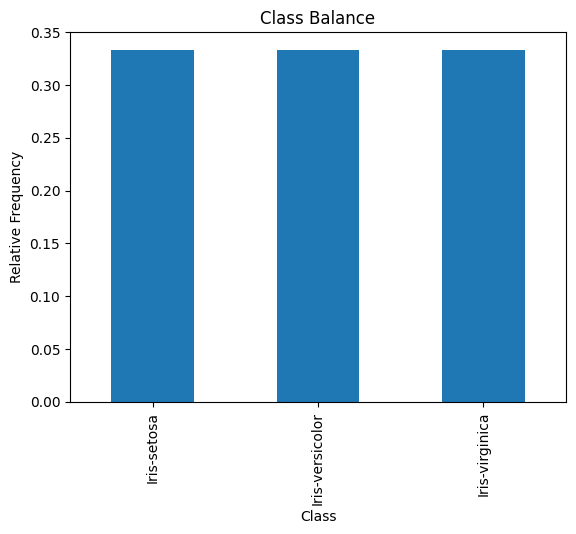

In [ ]:
# Class Balance plot
df["Species"].value_counts(normalize=True).plot(
        kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

In [ ]:
df.drop(columns="Id", inplace=True)

In [ ]:
# Numerical statistics
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Visualizations**

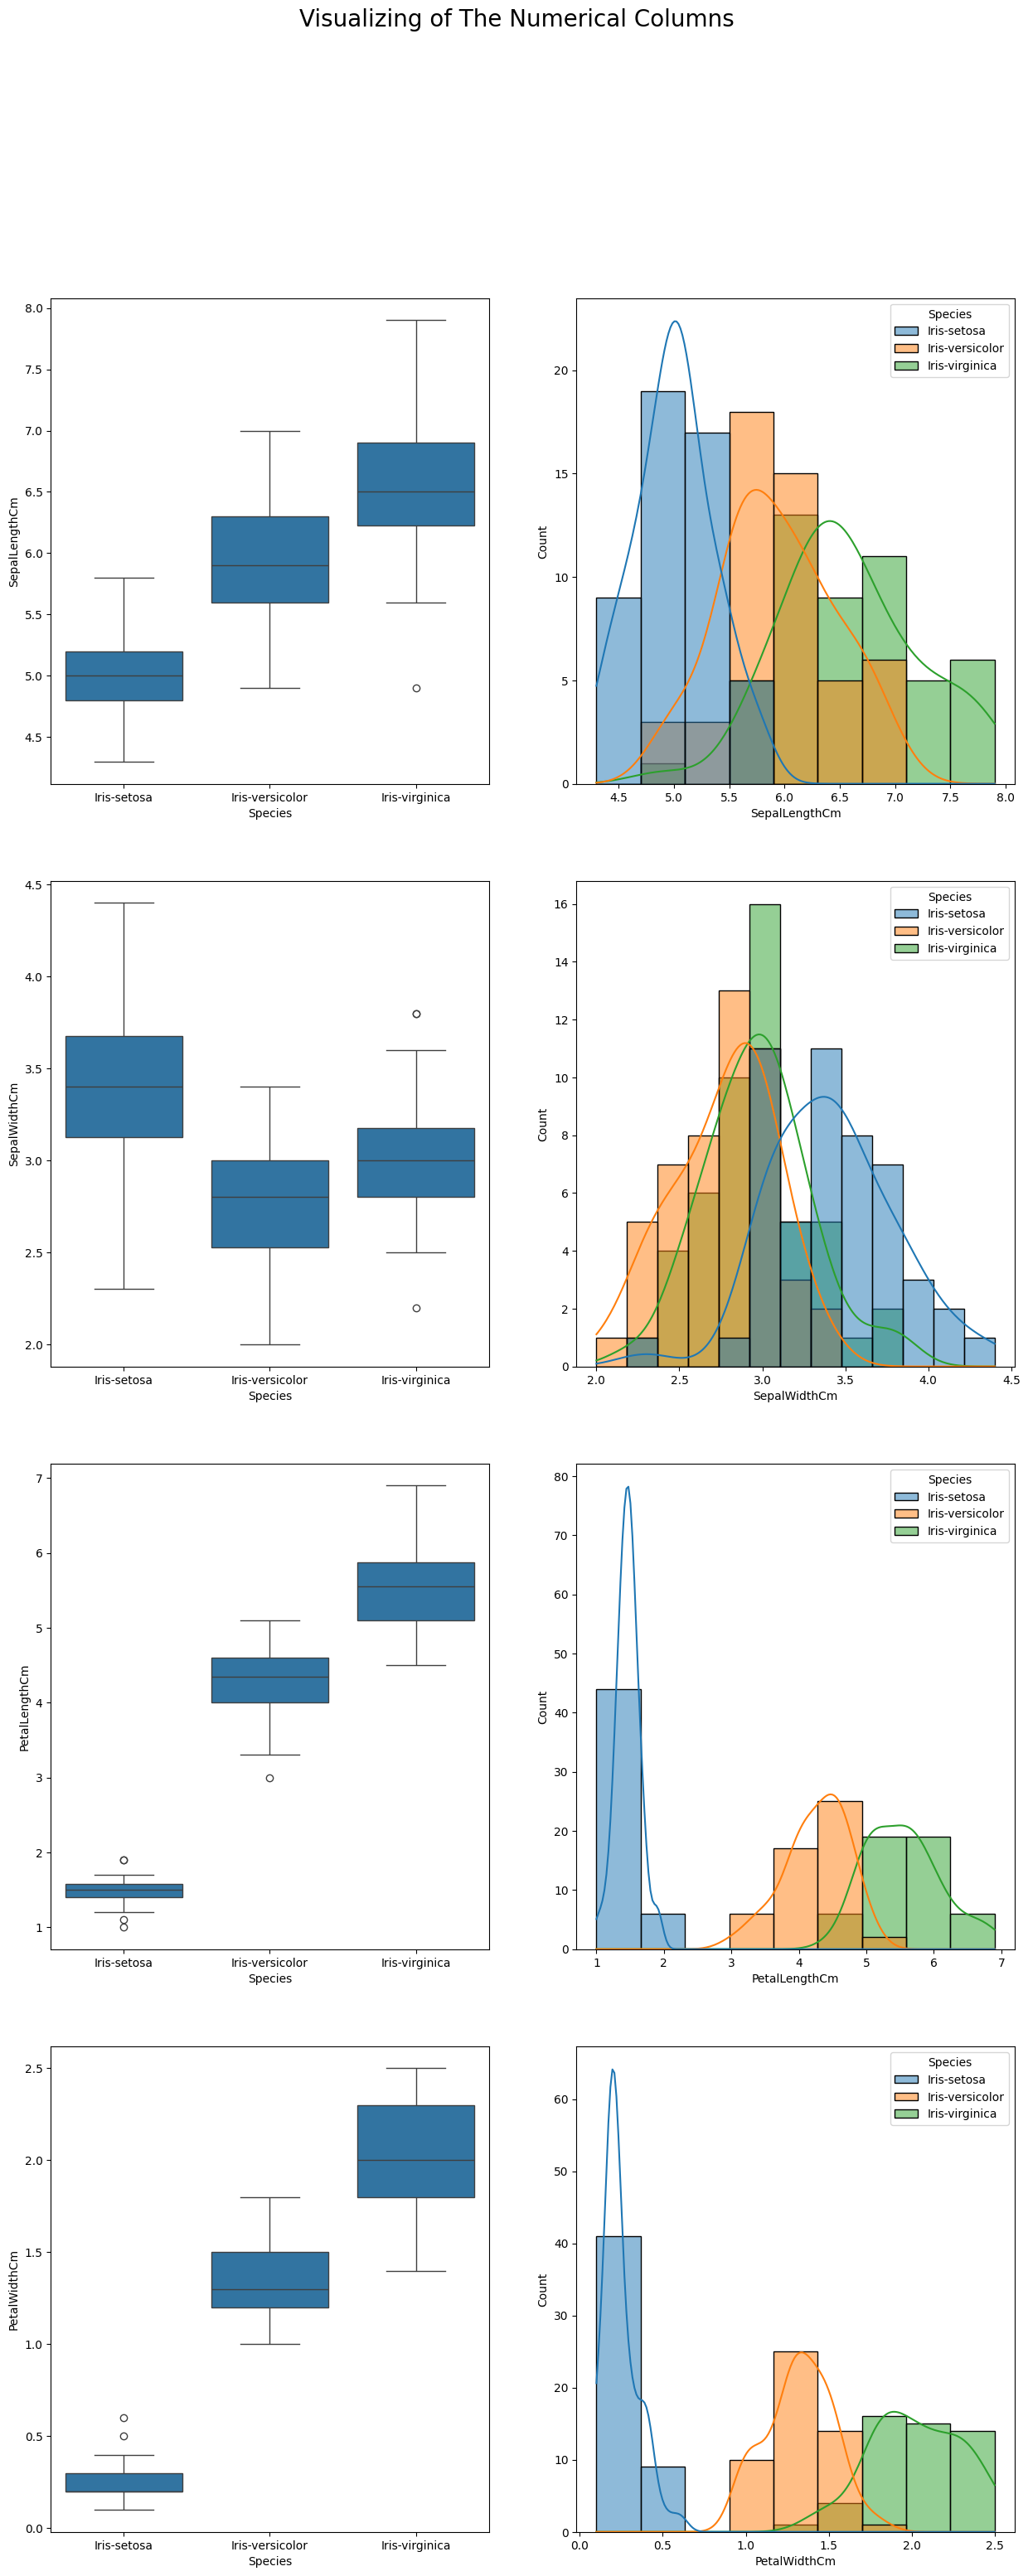

In [ ]:
fig,ax=plt.subplots(4,2,figsize=(15,35))
# Iterate over numerical columns
for index,i in enumerate(df.select_dtypes(include='number').columns):
    plt.suptitle("Visualizing of The Numerical Columns",size=20)
    sns.boxplot(x = "Species", y = i, data = df, ax=ax[index,0])
    sns.histplot(data = df, x = i, kde = True, hue = "Species", ax=ax[index,1])

The `sepal_length` feature has a normal distribution, with the setosa flowers having the lowest `sepal_length`, the versicolor flowers having a medium `sepal_length`, and the virginica flowers having the highest `sepal_length`.

Similarly, the `sepal_width` feature also has a normal distribution. Although there are differences in `sepal_width` distributions among the three species, these differences are not as extreme as for other features.

On the other hand, the `petal_length` feature has a pseudonormal distribution, with the setosa flowers having the lowest `petal_length`, the versicolor flowers having a medium `petal_length`, and the virginica flowers having the highest `petal_length`.

Finally, the `petal_width` feature also has a pseudonormal distribution, with the setosa flowers having the lowest `petal_width`, the virginica flowers having the highest `petal_width`, and the versicolor flowers having a medium `petal_width`. The `petal_width` feature values show significant differences depending on the species.

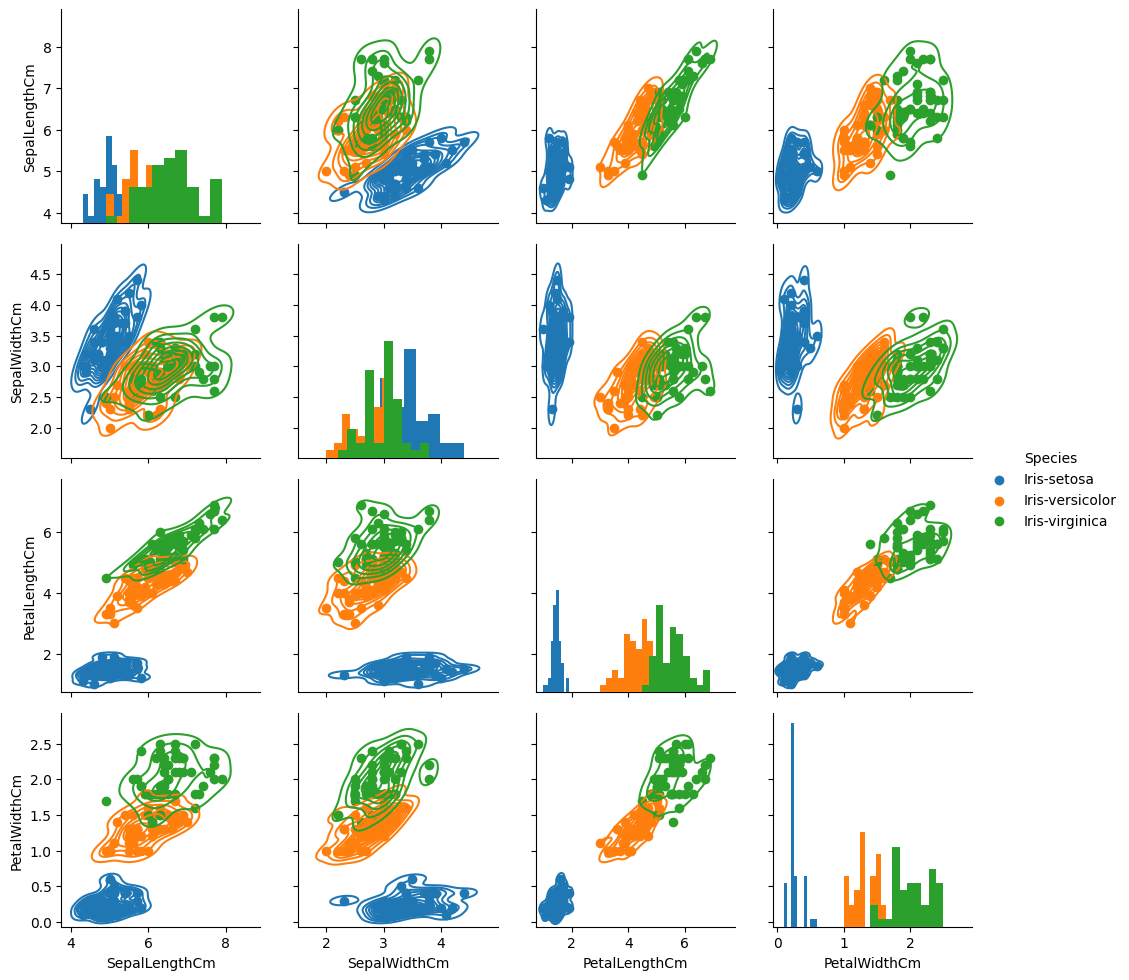

In [ ]:
fig = sns.PairGrid(df, hue="Species")

# type of graph for non-diagonal
fig = fig.map_diag(plt.hist)
fig = fig.map_offdiag(plt.scatter)
fig = fig.map_offdiag(sns.kdeplot)

# to add legends
fig = fig.add_legend()

# to show
plt.show();

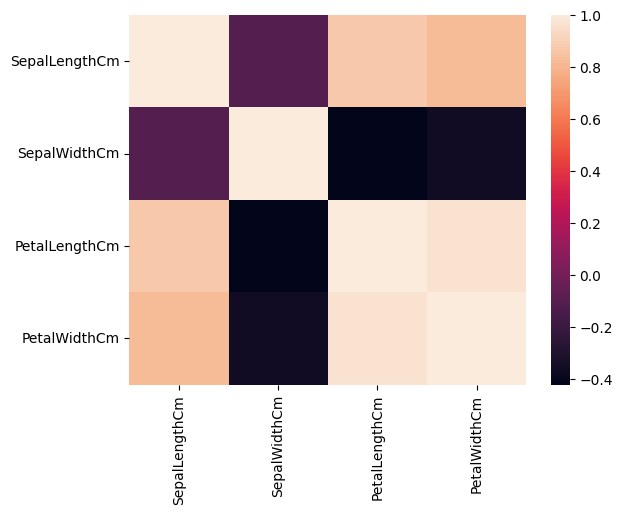

In [ ]:
corr = df.drop(columns="Species").corr()
# Plot heatmap of `correlation`
sns.heatmap(corr);

## **1.3. Split**

In [ ]:
target = "Species"
X = df.drop(columns= target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 4)
y shape: (150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


# **2. Build Model**

## **2.1. Baseline**

In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.34


## **2.2. Iterate**

In [ ]:
# Fit on `X_train`, `y_train`
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## **2.3. Evaluate**

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Training Accuracy
train_accuracy = round(accuracy_score(y_train, model.predict(X_train))*100,2) # Removed extra parentheses
print("Training Accuracy:", train_accuracy)

# Test Accuracy
a_Decision_Tree = round(accuracy_score(y_test, y_pred) * 100,2)
print("Test Accuracy:", a_Decision_Tree)

# F1 Score
f_Decision_Tree = round(f1_score(y_test, y_pred, average='weighted') * 100,2)
print("F1 Score:", f_Decision_Tree)

# Precision
p_Decision_Tree = round(precision_score(y_test, y_pred, average='weighted') * 100,2)
print("Precision:", p_Decision_Tree)

# Recall
r_Decision_Tree = round(recall_score(y_test, y_pred, average='weighted') * 100,2)
print("Recall:", r_Decision_Tree)

Training Accuracy: 100.0
Test Accuracy: 100.0
F1 Score: 100.0
Precision: 100.0
Recall: 100.0


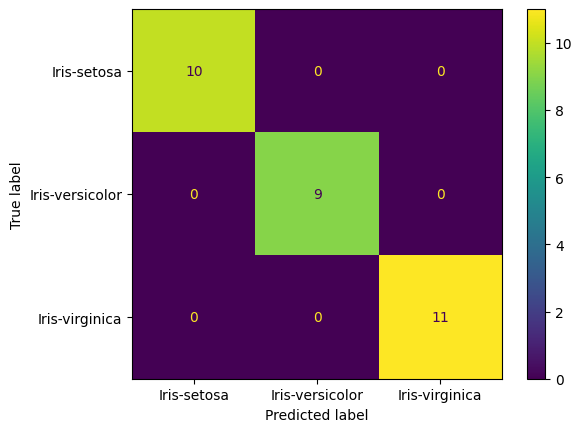

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [ ]:
depth = model.get_depth()
print(depth)

6


# **3. Result**

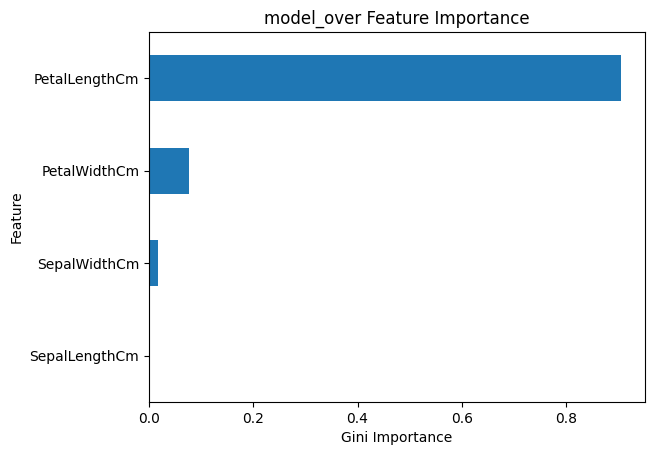

In [ ]:
# Get importances
importances = model.feature_importances_
# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train.columns).sort_values()
# Plot series
feat_imp.tail(15).plot(kind= "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

In [ ]:
from sklearn import tree
import graphviz

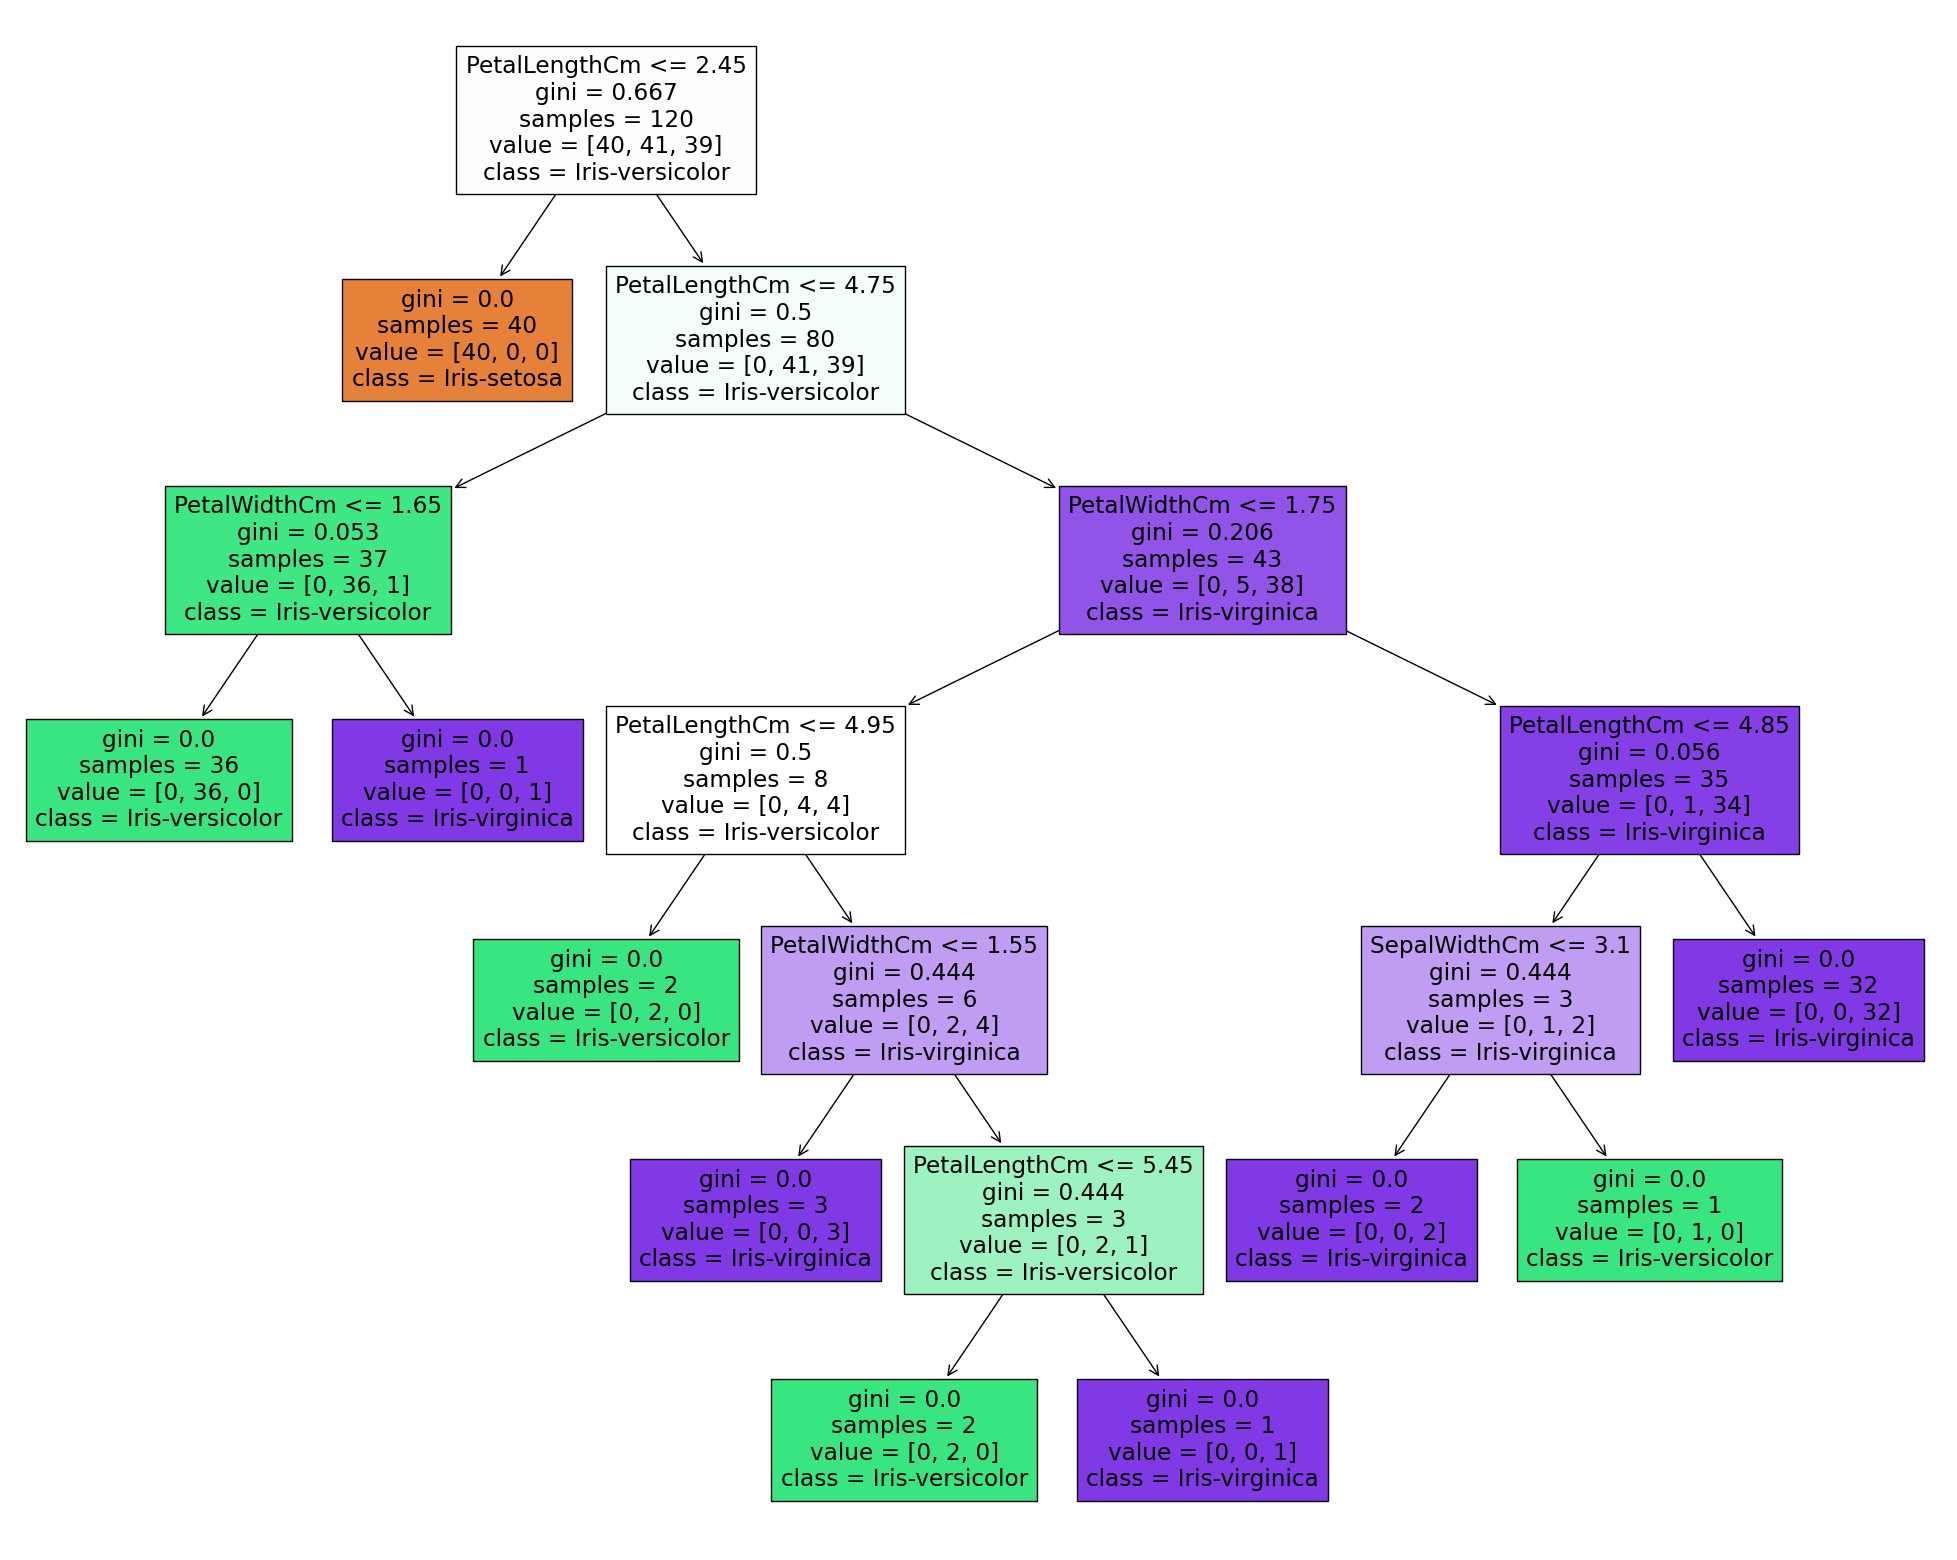

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=X_train.columns,
                   class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'], # Assuming your target variable is encoded as 0 and 1
                   filled=True)